# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# Оглавление

[Описание данных](#data) <br>
[Откроем файл с данными и изучим общую информацию](#open)
1. [Подготовка данных](#1)<br>
    1.1 [Приведем названия столбцов в подобающий вид](#1-1)<br>
    1.2 [Обработаем пропуски в данных](#1-2)<br>
    1.3 [Преобразуем данные в нужные типы](#1-3)<br>
    1.4 [Удаление ненужных столбцов](#1-4)<br>
    1.5 [Кодирование категориальных признаков](#1-5)<br>
    1.6 [Разобьем датафрейм](#1-6)<br>
    1.7 [Масштабирование признаков](#1-7)<br>
2. [Исследование задачи](#2)<br>
    2.1 [Исследование баланса классов](#2-1)<br>
    2.2 [Обучение модели без учёта дисбаланса](#2-2)<br>
3. [Борьба с дисбалансом](#3)<br>
    3.1 [Взвешивание классов](#3-1)<br>
    3.2 [Увеличение выборки](#3-2)<br>
    3.3 [Уменьшение выборки](#3-3)<br>
4. [Тестирование модели](#4)<br>
    4.1 [Проведем проверку модели на тестовой выборке](#4-1)<br>
    4.2 [Метрика AUC-ROC](#4-2)<br>
[Выводы](#end)<br>

---
<a id='data'></a>
# Описание данных
### 🧩 Признаки
•	RowNumber — индекс строки в данных <br>
•	CustomerId — уникальный идентификатор клиента <br>
•	Surname — фамилия <br>
•	CreditScore — кредитный рейтинг <br>
•	Geography — страна проживания <br>
•	Gender — пол <br>
•	Age — возраст <br>
•	Tenure — количество недвижимости у клиента <br>
•	Balance — баланс на счёте <br>
•	NumOfProducts — количество продуктов банка, используемых клиентом <br>
•	HasCrCard — наличие кредитной карты <br>
•	IsActiveMember — активность клиента <br>
•	EstimatedSalary — предполагаемая зарплата <br>
### 🎯 Целевой признак
•	Exited — факт ухода клиента

❗️ __В нашем случае стоит задача классификации, так как целевой признак является категориальным__

In [1]:
#   импорт необходимых библиотек
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.utils import shuffle

import warnings
warnings.simplefilter('ignore')

<a id='open'></a>
# Откроем файл с данными и изучим общую информацию

In [2]:
df_clients = pd.read_csv('.../datasets/Churn.csv')

In [3]:
print('Размер датафрейма:', np.shape(df_clients))
display(df_clients.sample(5))
df_clients.info()
df_clients.describe()

Размер датафрейма: (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4832,4833,15808389,Iheatu,617,France,Female,79,7.0,0.00,1,1,1,160589.18,0
3440,3441,15745605,Trevisan,722,France,Female,47,2.0,88011.40,1,1,1,90655.94,1
8232,8233,15732704,Piazza,582,Spain,Male,25,9.0,148042.97,2,1,0,52341.15,0
2989,2990,15636428,Sutherland,703,Spain,Female,45,1.0,0.00,1,1,0,182784.11,1
3949,3950,15717937,Gibbons,554,Germany,Male,43,5.0,99906.89,1,0,0,24983.39,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


📌 __Выводы после открытия файла__
> - Необходимо переименовать названия столбцов
> - Необходимо преобразовать данные в нужные типы
> - Необходимо обработать пропуски и заполнить в случае необходимости

📌 __Выводы по данным для обучения модели__ <br><br>
> ⚠️ _Для обучения нам не потребуются следующие столбцы:_
> - `RowNumber` — индекс строки в данных
> - `CustomerId` — уникальный идентификатор клиента
> - `Surname` — фамилия
> 
> ⚠️ _Имеем категориальные столбцы_
> - `Geography` — страна проживания
> - `Gender` — пол

<a id='1'></a>
# 1. Подготовка данных

<a id='1-1'></a>
## 1.1 Приведем названия столбцов в подобающий вид

📝 Для этого изменим формат названий столбоцов:
- все буквы - строчные
- слова разделены символом `_`

In [4]:
old_columns = list(df_clients.columns)
new_columns = []
for column in old_columns:
    per_str = ''
    for i in column:
        if ord(i) < 91:
            per_str += ('_' + i.lower())
        else:
            per_str += i
    per_str = per_str[1:]
    new_columns.append(per_str)
new_columns
    
df_clients.columns = new_columns

In [5]:
for i in range(len(old_columns)):
    print(old_columns[i], '->', new_columns[i])

RowNumber -> row_number
CustomerId -> customer_id
Surname -> surname
CreditScore -> credit_score
Geography -> geography
Gender -> gender
Age -> age
Tenure -> tenure
Balance -> balance
NumOfProducts -> num_of_products
HasCrCard -> has_cr_card
IsActiveMember -> is_active_member
EstimatedSalary -> estimated_salary
Exited -> exited


<a id='1-2'></a>
## 1.2 Обработаем пропуски в данных

📝 Пропуски в данных присутствуют только в столбце `tenure`

Text(0.5, 1.0, 'Пропущеные значения')

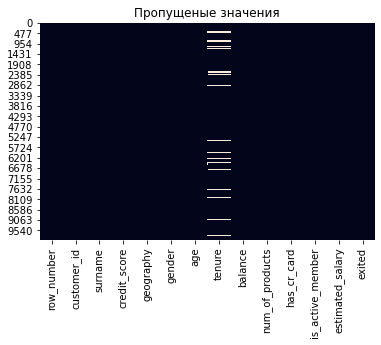

In [6]:
sns.heatmap(df_clients.isnull(), cbar = False).set_title("Пропущеные значения")

📝 Посмотрим какой процент записей не имеет информации в данной графе

In [7]:
print('Процент пустых значений:',
      len(df_clients['tenure'].loc[df_clients['tenure'].isnull()]) / len(df_clients['tenure']) * 100,
      '%')

Процент пустых значений: 9.09 %


📝 Считаю, что следует удалить данные значения так как:
- пропущены значения в признаке, который будет учавстовать в обучении и это может повлиять на результат 
- у нас достаточно большое кол-во данных, оставшихся должно хватить

In [8]:
df_clients = df_clients.dropna()

<a id='1-3'></a>
## 1.3 Преобразуем данные в нужные типы

📝 Исходя из первичного просмотра датафрэйма можно предположить, что столбец `Tenure` можно преобразовать в тип `int64` <br>
Посмотрим это проверив значения

In [9]:
int_or_float = df_clients['tenure'] % 1
print('Сумма остатков =', int_or_float.sum())

Сумма остатков = 0.0


📝 Таким образом преобразуем столбец в тип `int64`

In [10]:
df_clients['tenure'] = df_clients['tenure'].astype('int64')
df_clients.dtypes

row_number            int64
customer_id           int64
surname              object
credit_score          int64
geography            object
gender               object
age                   int64
tenure                int64
balance             float64
num_of_products       int64
has_cr_card           int64
is_active_member      int64
estimated_salary    float64
exited                int64
dtype: object

<a id='1-4'></a>
## 1.4 Удаление ненужных столбцов

📝 Столбцы `row_number`, `customer_id` и `surname` не несут для нас полезной нагрузки для обучения, избавимся от них

In [11]:
df_clients = df_clients.drop(['row_number', 'customer_id', 'surname'], axis=1)

<a id='1-5'></a>
## 1.5 Кодирование категориальных признаков

📝 Так как текстовые данные плохо сочетаются с алгоритмами машинного обучения, преобразуем категориальные признаки (столбцы `geography` и `gender`) в числовые <br>
- Для `gender` используем `Label Encoder` (так как у нас только 2 уникальных значения) <br>
- Для `geography` используем `One-Hot Encoding` (3 уникальные страны)

### 1.5.1 Столбец `gender`

In [12]:
print('Уникальные значения "gender"', df_clients['gender'].unique())
encoder = LabelEncoder()
df_clients['gender'] = encoder.fit_transform(df_clients['gender'])

Уникальные значения "gender" ['Female' 'Male']


📝 Переименуем стоблец `gender` в `is_male`, так как коды следующие: 
- `male` -> 1
- `female` -> 0

In [13]:
df_clients = df_clients.rename(columns={'gender': 'is_male'})

### 1.5.2 Столбец `geography`

In [14]:
df_clients = pd.get_dummies(df_clients, drop_first=True)

In [15]:
df_clients = df_clients.rename(columns={'geography_Germany': 'geography_germany',
                                        'geography_Spain' : 'geography_spain'})
df_clients.sample(5)

,credit_score,is_male,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_germany,geography_spain
1212,610,1,42,6,0.00,2,1,0,158302.59,1,0,1
584,647,0,51,1,119741.77,2,0,0,54954.51,1,1,0
6883,691,1,30,9,0.00,1,1,0,49594.02,0,0,0
1756,618,1,37,2,168178.21,2,0,1,101273.23,0,0,0
9722,679,0,36,3,0.00,2,1,1,2243.41,0,0,0


<a id='1-6'></a>
## 1.6 Разобьем датафрейм

📝 Данные будем разбивать на три выборки: <br>
- обучающую выборку - 60%
- валидационную выборку - 20%
- тестовую выборку - 20%

In [16]:
df_train, df_others = train_test_split(df_clients, test_size=0.4, random_state=12345)
df_valid, df_test = train_test_split(df_others, test_size=0.5, random_state=12345)
print('Общий размер df:', df_clients.shape)
print('Размер обучающая выборки:', df_train.shape)
print('Размер валидационной выборки:', df_valid.shape)
print('Размер тестовой выборки:', df_test.shape)

Общий размер df: (9091, 12)
Размер обучающая выборки: (5454, 12)
Размер валидационной выборки: (1818, 12)
Размер тестовой выборки: (1819, 12)


📝 Разобъем по переменным признаки и целевые признаки

In [17]:
#   Обучающая выборка
features_train = df_train.drop(['exited'], axis=1)
target_train = df_train['exited']

#   Валидационная выборка
features_valid = df_valid.drop(['exited'], axis=1)
target_valid = df_valid['exited']

#   Тестовая выборка
features_test = df_test.drop(['exited'], axis=1)
target_test = df_test['exited']

<a id='1-7'></a>
## 1.7 Масштабирование признаков

📝 Произведем масштабирование численных признаков датафрейма

In [18]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [19]:
display(features_train.sample(2))
display(features_valid.sample(2))
display(features_test.sample(2))

,credit_score,is_male,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_germany,geography_spain
3733,0.416757,1,2.631242,1.385532,1.299421,-0.908179,1,1,-0.013953,1,0
6907,-1.338353,1,-0.474624,0.007517,-1.237830,-0.908179,1,0,-0.547800,0,0


,credit_score,is_male,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_germany,geography_spain
7186,0.045086,1,0.466548,1.041028,-1.237830,0.809300,1,1,0.935454,0,0
5684,0.891669,0,-1.321678,-0.681491,0.243528,-0.908179,0,0,-1.237581,0,0


,credit_score,is_male,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_germany,geography_spain
6211,-1.513864,0,0.090079,0.696524,0.656761,-0.908179,0,0,1.652266,1,0
7926,-0.842793,0,1.407719,0.007517,0.253178,0.809300,1,0,1.003470,0,1


📌 __Выводы по подготовке данных__
> В процессе подготовки данных была проведена предобработка:
> - столбцы были переименованы соответствующим образом
> - обработаны пропуски (удалили значения т.к. их было не очень много)
> - данные были преобразованны в соответствующие форматы
> Дальше процесс подготовки данных был следующим:
> - удалили признаки, которые нам не нужны при обучении (`row_number`, `customer_id`, `surname`)
> - была произведена кодировка категориальных признаков (`gender` с помощью Label Encoder и `geography` используя One-Hot Encoding)
> - также проведены разбиения:
>> 1. на тестовую, валидационную и обучающую выборки
>> 2. признаки и целевые признаки по переменным
> - произведено масштабирование численных признаков датафрейма
---

<a id='2'></a>
# 2. Исследование задачи

__Функции, написанные для автоматизации__ <br>
[⏬⏬⏬⏬SKIP⏬⏬⏬⏬](#2-1)

In [20]:
def do_a_tree_f1(my_features_train, 
                 my_target_train, 
                 my_features_pred,
                 my_target_pred,
                 my_depth='default',
                 balance=False):
    if balance == False:
        if my_depth == 'default':
            model = DecisionTreeClassifier(random_state=12345)
            model.fit(my_features_train, my_target_train)
        else:
            model = DecisionTreeClassifier(random_state=12345, max_depth=my_depth)
            model.fit(my_features_train, my_target_train)
    else:
        if my_depth == 'default':
            model = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
            model.fit(my_features_train, my_target_train)
        else:
            model = DecisionTreeClassifier(random_state=12345, max_depth=my_depth, class_weight='balanced')
            model.fit(my_features_train, my_target_train)
            
    predictions = model.predict(my_features_pred)
    
    print('F1-метрика дерева решений (max_depth: {}): {}'.format(my_depth, f1_score(my_target_pred, predictions)))
    return f1_score(my_target_pred, predictions)
    
    
def do_a_rand_tree_f1(my_features_train, 
                      my_target_train, 
                      my_features_pred,
                      my_target_pred,
                      my_depth='default',
                      my_est='default',
                      balance=False):
    if balance == False:
        if (my_depth == 'default') and (my_est == 'default'):
            model = RandomForestClassifier(random_state=12345)
            model.fit(my_features_train, my_target_train)

        elif my_est == 'default':
            model = RandomForestClassifier(random_state=12345, max_depth=my_depth)
            model.fit(my_features_train, my_target_train)

        elif my_depth == 'default':
            model = RandomForestClassifier(random_state=12345, n_estimators=my_est)
            model.fit(my_features_train, my_target_train)
            
        else:
            model = RandomForestClassifier(random_state=12345, max_depth=my_depth, n_estimators=my_est)
            model.fit(my_features_train, my_target_train)
    else:
        if (my_depth == 'default') and (my_est == 'default'):
            model = RandomForestClassifier(random_state=12345, class_weight='balanced')
            model.fit(my_features_train, my_target_train)

        elif my_est == 'default':
            model = RandomForestClassifier(random_state=12345, max_depth=my_depth, class_weight='balanced')
            model.fit(my_features_train, my_target_train)

        elif my_depth == 'default':
            model = RandomForestClassifier(random_state=12345, n_estimators=my_est, class_weight='balanced')
            model.fit(my_features_train, my_target_train)
            
        else:
            model = RandomForestClassifier(random_state=12345, max_depth=my_depth, n_estimators=my_est, class_weight='balanced')
            model.fit(my_features_train, my_target_train)
    
    predictions = model.predict(my_features_pred)
    
    print('F1-метрика случайного леса (max_depth: {}): {}'.format(my_depth, f1_score(my_target_pred, predictions)))
    return f1_score(my_target_pred, predictions)

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, 
                                                   target_upsampled, 
                                                   random_state=12345)
    
    return features_upsampled, target_upsampled


def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, 
                                                       target_downsampled, 
                                                       random_state=12345)
    
    return features_downsampled, target_downsampled

<a id='2-1'></a>
## 2.1 Исследование баланса классов

📝 Построим гистограмму целевого признака для определения баланса/дисбаланса классов

"0" больше чем единиц в ~ 4 раз(а)


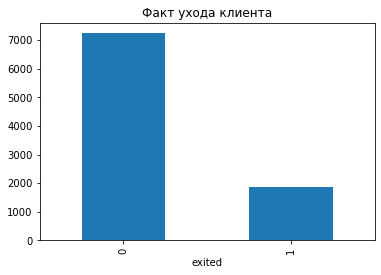

In [21]:
group_excited = df_clients.groupby('exited')['exited'].count()
group_excited.plot(kind='bar')
plt.title('Факт ухода клиента')
print('"0" больше чем единиц в ~', round(group_excited.loc[0] / group_excited.loc[1]),'раз(а)')

✅ Как видно из гистограммы, значительный перевес на стороне классов с целевым признаком "0" => они несбалансированы. Для корректного обучения модели мы будем балансировать их.<br>
Однако, вначале будем обучать модель без учёта дисбаланса.

<a id='2-2'></a>
## 2.2 Обучение модели без учёта дисбаланса

### 2.2.1 Дерево решений

📝 Вычислим метрику F1 для деревьев решений с максимальной глубиной в диапазоне [2, 20]

In [22]:
print('F1-метрика на валидационной выборке')
print('-----------------------------------')
for max_depth in range(2, 21):
    predictions = do_a_tree_f1(features_train, target_train, features_valid, target_valid, max_depth)

F1-метрика на валидационной выборке
-----------------------------------
F1-метрика дерева решений (max_depth: 2): 0.5304878048780488
F1-метрика дерева решений (max_depth: 3): 0.3726708074534161
F1-метрика дерева решений (max_depth: 4): 0.5414551607445008
F1-метрика дерева решений (max_depth: 5): 0.5140712945590994
F1-метрика дерева решений (max_depth: 6): 0.5606837606837607
F1-метрика дерева решений (max_depth: 7): 0.5764331210191083
F1-метрика дерева решений (max_depth: 8): 0.5457516339869282
F1-метрика дерева решений (max_depth: 9): 0.5432098765432098
F1-метрика дерева решений (max_depth: 10): 0.5178294573643412
F1-метрика дерева решений (max_depth: 11): 0.5075528700906344
F1-метрика дерева решений (max_depth: 12): 0.476878612716763
F1-метрика дерева решений (max_depth: 13): 0.4851904090267983
F1-метрика дерева решений (max_depth: 14): 0.4789115646258504
F1-метрика дерева решений (max_depth: 15): 0.49595687331536387
F1-метрика дерева решений (max_depth: 16): 0.4918478260869565
F1-мет

✅ Наилучший результат показала модель с максимальной глубиной решающего дерева 7: 0.5764331210191083

### 2.2.2 Случайный лес

📝 Гиперпараметры, которые мы будем менять тут:

- количество деревьев: [10, 20] с шагом 2
- максимальная глубина: [2, 10]

In [23]:
for est in range(10, 21, 2):
    print('Кол-во деревьев в лесу:', est, '-------------------------------------')
    for max_depth in range(2, 11):
        print('  ', end='')
        prediction = do_a_rand_tree_f1(features_train, target_train, features_valid, target_valid, max_depth, est)

Кол-во деревьев в лесу: 10 -------------------------------------
  F1-метрика случайного леса (max_depth: 2): 0.13366336633663367
  F1-метрика случайного леса (max_depth: 3): 0.33839479392624733
  F1-метрика случайного леса (max_depth: 4): 0.47892720306513403
  F1-метрика случайного леса (max_depth: 5): 0.4806201550387597
  F1-метрика случайного леса (max_depth: 6): 0.5411334552102377
  F1-метрика случайного леса (max_depth: 7): 0.5506216696269983
  F1-метрика случайного леса (max_depth: 8): 0.5831903945111492
  F1-метрика случайного леса (max_depth: 9): 0.5699658703071673
  F1-метрика случайного леса (max_depth: 10): 0.5565217391304348
Кол-во деревьев в лесу: 12 -------------------------------------
  F1-метрика случайного леса (max_depth: 2): 0.08142493638676844
  F1-метрика случайного леса (max_depth: 3): 0.29017857142857145
  F1-метрика случайного леса (max_depth: 4): 0.45275590551181105
  F1-метрика случайного леса (max_depth: 5): 0.4728682170542636
  F1-метрика случайного леса (m

✅ Наилучший результат показала модель с гиперпараметрами: <br>
- кол-вом деревьев в лесу: 14
- максимальной глубиной решающего дерева 8 

__F1-метрика = 0.5856164383561644__

### 2.2.3 Логистическая регрессия

In [24]:
model = LogisticRegression(random_state=12345)
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
print('Логистическая регрессия =', f1_score(target_valid, predictions))

Логистическая регрессия = 0.30400000000000005


✅ Логистическая регрессия показала результат F1-метрики = 0.30400000000000005

📌 __Выводы по обучению модели без учёта дисбаланса__
> - лучший результат был достигнут случайным лесом (кол-во деревьев: 14 и максимальная глубина  8). __F1-метрика = 0.5856164383561644__ 
> - с помощью решающего дерева удалось достигнуть __F1-метрики = 0.5764331210191083__ с максимальной глубиной решающего дерева 7
> - логистическая регрессия показала результат __F1-метрики = 0.30400000000000005__
---

<a id='3'></a>
# 3. Борьба с дисбалансом

<a id='3-1'></a>
## 3.1 Взвешивание классов

📝 Обучим модели с параметром `class_weight='balanced'`

### 3.1.1 Дерево решений

In [25]:
print('F1-метрика на валидационной выборке')
print('-----------------------------------')
for max_depth in range(2, 21):
    predictions = do_a_tree_f1(features_train, target_train, features_valid, target_valid, max_depth, True)

F1-метрика на валидационной выборке
-----------------------------------
F1-метрика дерева решений (max_depth: 2): 0.5297619047619048
F1-метрика дерева решений (max_depth: 3): 0.548936170212766
F1-метрика дерева решений (max_depth: 4): 0.5461187214611872
F1-метрика дерева решений (max_depth: 5): 0.5735449735449736
F1-метрика дерева решений (max_depth: 6): 0.5630885122410546
F1-метрика дерева решений (max_depth: 7): 0.5409990574929311
F1-метрика дерева решений (max_depth: 8): 0.560344827586207
F1-метрика дерева решений (max_depth: 9): 0.509933774834437
F1-метрика дерева решений (max_depth: 10): 0.514161220043573
F1-метрика дерева решений (max_depth: 11): 0.5107344632768361
F1-метрика дерева решений (max_depth: 12): 0.5079754601226995
F1-метрика дерева решений (max_depth: 13): 0.4857496902106567
F1-метрика дерева решений (max_depth: 14): 0.48984771573604063
F1-метрика дерева решений (max_depth: 15): 0.46675358539765316
F1-метрика дерева решений (max_depth: 16): 0.46701846965699206
F1-метр

✅ Лучшее значение F1-метрики равно __0.5735449735449736__ при `max_depth = 5`

### 3.1.2 Случайный лес

In [26]:
for est in range(10, 21, 2):
    print('Кол-во деревьев в лесу:', est, '-------------------------------------')
    for max_depth in range(2, 11):
        print('  ', end='')
        prediction = do_a_rand_tree_f1(features_train, target_train, features_valid, target_valid, max_depth, est, True)

Кол-во деревьев в лесу: 10 -------------------------------------
  F1-метрика случайного леса (max_depth: 2): 0.55
  F1-метрика случайного леса (max_depth: 3): 0.5361620057859209
  F1-метрика случайного леса (max_depth: 4): 0.5658031088082901
  F1-метрика случайного леса (max_depth: 5): 0.5938494167550371
  F1-метрика случайного леса (max_depth: 6): 0.6015037593984962
  F1-метрика случайного леса (max_depth: 7): 0.6126526082130965
  F1-метрика случайного леса (max_depth: 8): 0.6197183098591549
  F1-метрика случайного леса (max_depth: 9): 0.6148325358851674
  F1-метрика случайного леса (max_depth: 10): 0.6178010471204188
Кол-во деревьев в лесу: 12 -------------------------------------
  F1-метрика случайного леса (max_depth: 2): 0.5553319919517102
  F1-метрика случайного леса (max_depth: 3): 0.5423387096774194
  F1-метрика случайного леса (max_depth: 4): 0.5749741468459151
  F1-метрика случайного леса (max_depth: 5): 0.6044538706256628
  F1-метрика случайного леса (max_depth: 6): 0.6045

✅ F1-метрика случайного леса улучшилась при балансировке параметром. При количестве деревьев = 20 и макс.глубиной 10 __F1-метрика = 0.6340819022457067__

### 3.1.3 Логистическая регрессия

In [27]:
model = LogisticRegression(random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
print('Логистическая регрессия =', f1_score(target_valid, predictions))

Логистическая регрессия = 0.509731232622799


✅ Логистическая регрессия также при балансировке улучшила __F1-метрику = 0.509731232622799__

📌 __Выводы по обучению модели с параметром `class_weight='balanced'`__
> - Логистическая модель и случайный лес при балансеровке улучшили свои F1-метрики, дерево решений ухудшило
> - Лучший результат _Случайный лес (кол-во деревьев=20, макс.глубина=10)_ __F1-метрика = 0.6340819022457067__

<a id='3-2'></a>
## 3.2 Увеличение выборки

📝 Воспользуемся методом upsampling, для этого увеличим кол-во классов со значением целевого признака "1". Как нам известно, "отстающие" классы мы будем увеличивать в _4 раза_.

<AxesSubplot:xlabel='exited'>

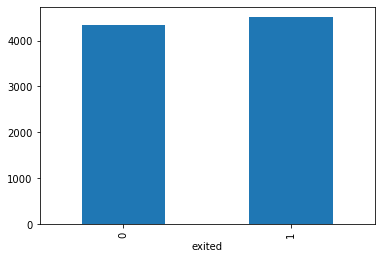

In [28]:
df_features_upsampled, df_target_upsampled = upsample(features_train, target_train, 4)
df_target_upsampled.groupby(df_target_upsampled).count().plot(kind='bar')

✅ Классы были сбалансированны методом upsampling. Приступим к обучению

### 3.2.1 Дерево решений

In [29]:
print('F1-метрика на валидационной выборке')
print('-----------------------------------')
for max_depth in range(2, 21):
    predictions = do_a_tree_f1(df_features_upsampled, df_target_upsampled, features_valid, target_valid, max_depth)

F1-метрика на валидационной выборке
-----------------------------------
F1-метрика дерева решений (max_depth: 2): 0.5297619047619048
F1-метрика дерева решений (max_depth: 3): 0.548936170212766
F1-метрика дерева решений (max_depth: 4): 0.5461187214611872
F1-метрика дерева решений (max_depth: 5): 0.5735449735449736
F1-метрика дерева решений (max_depth: 6): 0.5630885122410546
F1-метрика дерева решений (max_depth: 7): 0.5437441204139228
F1-метрика дерева решений (max_depth: 8): 0.5617740232312566
F1-метрика дерева решений (max_depth: 9): 0.5127635960044394
F1-метрика дерева решений (max_depth: 10): 0.5086956521739131
F1-метрика дерева решений (max_depth: 11): 0.5095828635851184
F1-метрика дерева решений (max_depth: 12): 0.5030525030525032
F1-метрика дерева решений (max_depth: 13): 0.49066002490660027
F1-метрика дерева решений (max_depth: 14): 0.4836272040302267
F1-метрика дерева решений (max_depth: 15): 0.46640316205533594
F1-метрика дерева решений (max_depth: 16): 0.4704336399474376
F1-ме

### 3.2.2 Случайный лес

In [30]:
for est in range(10, 21, 2):
    print('Кол-во деревьев в лесу:', est, '-------------------------------------')
    for max_depth in range(2, 11):
        print('  ', end='')
        prediction = do_a_rand_tree_f1(df_features_upsampled, 
                                       df_target_upsampled, 
                                       features_valid, 
                                       target_valid, 
                                       max_depth, 
                                       est)

Кол-во деревьев в лесу: 10 -------------------------------------
  F1-метрика случайного леса (max_depth: 2): 0.536
  F1-метрика случайного леса (max_depth: 3): 0.5344827586206896
  F1-метрика случайного леса (max_depth: 4): 0.5768025078369906
  F1-метрика случайного леса (max_depth: 5): 0.5764462809917356
  F1-метрика случайного леса (max_depth: 6): 0.5952890792291221
  F1-метрика случайного леса (max_depth: 7): 0.6060606060606061
  F1-метрика случайного леса (max_depth: 8): 0.5928338762214983
  F1-метрика случайного леса (max_depth: 9): 0.6102449888641427
  F1-метрика случайного леса (max_depth: 10): 0.5977011494252874
Кол-во деревьев в лесу: 12 -------------------------------------
  F1-метрика случайного леса (max_depth: 2): 0.5350444225074038
  F1-метрика случайного леса (max_depth: 3): 0.5333333333333334
  F1-метрика случайного леса (max_depth: 4): 0.5714285714285715
  F1-метрика случайного леса (max_depth: 5): 0.5824847250509165
  F1-метрика случайного леса (max_depth: 6): 0.597

### 3.2.3 Логистическая регрессия

In [31]:
model = LogisticRegression(random_state=12345)
model.fit(df_features_upsampled, df_target_upsampled)
predictions = model.predict(features_valid)
print('Логистическая регрессия =', f1_score(target_valid, predictions))

Логистическая регрессия = 0.5085972850678734


✅ Модели построенные на выбоках сбалансированных методом upsampling не показала лучших результатов, чем _Взвешивание классов_. __Лучшая F1-метрика при upsampling = 0.6220204313280364__

<a id='3-3'></a>
## 3.3 Уменьшение выборки

📝 Воспользуемся методом downsampling, для этого уменьшим кол-во классов со значением целевого признака "0". Как нам известно, "опережающие" классы мы будем уменьшать в 4 раза.

<AxesSubplot:xlabel='exited'>

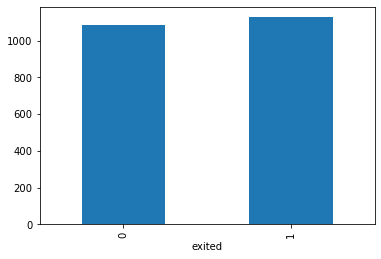

In [32]:
df_features_downsampled, df_target_downsampled = downsample(features_train, target_train, 0.25)
df_target_downsampled.groupby(df_target_downsampled).count().plot(kind='bar')

✅ Классы были сбалансированны методом downsampling. Приступим к обучению

### 3.3.1 Дерево решений

In [33]:
print('F1-метрика на валидационной выборке')
print('-----------------------------------')
for max_depth in range(2, 21):
    predictions = do_a_tree_f1(df_features_downsampled, df_target_downsampled, features_valid, target_valid, max_depth)

F1-метрика на валидационной выборке
-----------------------------------
F1-метрика дерева решений (max_depth: 2): 0.5100788781770377
F1-метрика дерева решений (max_depth: 3): 0.5100788781770377
F1-метрика дерева решений (max_depth: 4): 0.5563173359451519
F1-метрика дерева решений (max_depth: 5): 0.5543199315654406
F1-метрика дерева решений (max_depth: 6): 0.5636704119850188
F1-метрика дерева решений (max_depth: 7): 0.5547309833024119
F1-метрика дерева решений (max_depth: 8): 0.548828125
F1-метрика дерева решений (max_depth: 9): 0.5203405865657521
F1-метрика дерева решений (max_depth: 10): 0.5
F1-метрика дерева решений (max_depth: 11): 0.5146520146520146
F1-метрика дерева решений (max_depth: 12): 0.491588785046729
F1-метрика дерева решений (max_depth: 13): 0.5059578368469294
F1-метрика дерева решений (max_depth: 14): 0.5
F1-метрика дерева решений (max_depth: 15): 0.5022665457842248
F1-метрика дерева решений (max_depth: 16): 0.49864498644986455
F1-метрика дерева решений (max_depth: 17): 

### 3.3.2 Случайный лес

In [34]:
for est in range(10, 21, 2):
    print('Кол-во деревьев в лесу:', est, '-------------------------------------')
    for max_depth in range(2, 11):
        print('  ', end='')
        prediction = do_a_rand_tree_f1(df_features_downsampled, 
                                       df_target_downsampled, 
                                       features_valid, 
                                       target_valid, 
                                       max_depth, 
                                       est)

Кол-во деревьев в лесу: 10 -------------------------------------
  F1-метрика случайного леса (max_depth: 2): 0.5194570135746606
  F1-метрика случайного леса (max_depth: 3): 0.5634365634365635
  F1-метрика случайного леса (max_depth: 4): 0.5615763546798029
  F1-метрика случайного леса (max_depth: 5): 0.5606936416184971
  F1-метрика случайного леса (max_depth: 6): 0.5763747454175152
  F1-метрика случайного леса (max_depth: 7): 0.5734265734265734
  F1-метрика случайного леса (max_depth: 8): 0.5675413022351798
  F1-метрика случайного леса (max_depth: 9): 0.5584045584045584
  F1-метрика случайного леса (max_depth: 10): 0.5542635658914729
Кол-во деревьев в лесу: 12 -------------------------------------
  F1-метрика случайного леса (max_depth: 2): 0.5296803652968036
  F1-метрика случайного леса (max_depth: 3): 0.5591397849462366
  F1-метрика случайного леса (max_depth: 4): 0.5562015503875969
  F1-метрика случайного леса (max_depth: 5): 0.5634075508228461
  F1-метрика случайного леса (max_dep

### 3.3.3 Логистическая регрессия

In [35]:
model = LogisticRegression(random_state=12345)
model.fit(df_features_downsampled, df_target_downsampled)
predictions = model.predict(features_valid)
print('Логистическая регрессия =', f1_score(target_valid, predictions))

Логистическая регрессия = 0.5044883303411131


✅ Методика downsampling в данном случае показала хучший результат, если оценивать по метрике F1, __лучший результат = 0.5904203323558163__

📌 __Выводы по обучению модели с учётом дисбаланса__
> - лучший результат был достигнут взвешивание классов `class_weight='balanced'`. При количестве деревьев = 20 и макс.глубиной 10 __F1-метрика = 0.6340819022457067__
> - Остальные методы (upsampled и downsampled) показали результаты хуже (0.6220204313280364 и 0.5904203323558163 соответственно)
---

<a id='4'></a>
# 4. Тестирование модели

<a id='4-1'></a>
## 4.1 Проведем проверку модели на тестовой выборке

📝 Для тестирования возьмем модель, которая показала наилучшую F1-метрику на валидационной выборке: 
- случайный лес
- количество деревьев = 20 
- макс.глубина = 10
- взвешивание классов

Проверим данную модель на тестовой выборке

In [36]:
print('Кол-во деревьев в лесу:', 20, '-------------------------------------')
f1_rand_trees =do_a_rand_tree_f1(features_train, 
                                 target_train, 
                                 features_test, 
                                 target_test, 
                                 10, 
                                 20,
                                 True)

Кол-во деревьев в лесу: 20 -------------------------------------
F1-метрика случайного леса (max_depth: 10): 0.6022408963585433


✅ Мы добилист __F1-метрики на тестовой выборке: 0.6022408963585433__, что __можно считать успехом__, т.к. это выше установленной заданием границы в 0.59

<a id='4-2'></a>
## 4.2 Метрика AUC-ROC

📝 Построим ROC-кривую и посчитаем метрику AUC-ROC

<Figure size 432x288 with 0 Axes>

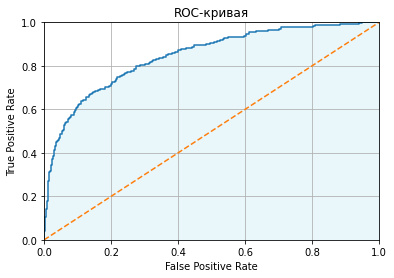

Метрика AUC-ROC = 0.8460626314849747


In [37]:
model = RandomForestClassifier(random_state=12345, 
                               max_depth=10, 
                               n_estimators=20, 
                               class_weight='balanced')
model.fit(features_train, target_train)

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

plt.figure()

plt.figure()
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, color='#2dbad2', alpha=0.1)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.grid()
plt.show() 

auc_roc = roc_auc_score(target_test, model.predict_proba(features_test)[:, 1])
print('Метрика AUC-ROC =', auc_roc)

✅ Построенная нами модель также хорошо себя показала в __AUC-ROC = 0.8460626314849747__. AUC-ROC случайной модели равна 0.5 => __наша метрика выше__.

<a id='end'></a>
# Выводы
🚩 __Цель проекта достигнута.__ Удалось построить такую модель F1-метрика которой выше 0.59 (F1-метрика случайного леса при взвешивании класов, количестве деревьев = 20 и макс.глубиной 10 = 0.6340819022457067 на валидационной выбоке, на тестовой выборке: 0.6022408963585433). При этом метрика AUC-ROC = 0.8460626314849747 <br>
_Для этого было сделано следующее:_
- осуществлена предобработка и подготовка данных (кодирование категориальных признаков, разбивка DF на выборки (обучающая, валидационная, тестовая) и признаки/целевые признаки и масштабирование колличественных данных)
- проведено исследование баланса данных _(в целевом признаке значений "клиент в системе" было в ~4 раза больше, чем "клиент ушел"_
- осуществленно обучение моделей "Дерево решений" и их анализ (подбираемые гиперпараметры: макс.глубина), "Случайный лес" (подбираемые гиперпараметры: макс.глубина, кол-во деревьев) и "Логистическая регрессия" с вариантами работы с дисбалансом:
> - без учета дисбаланса
> - взвешивая классы `class_weight='balanced'`
> - увеличение выборки методом upsampling
> - уменьшение выборки методом downsampling
- проведено проверка наиболее удачной модели на тестовой выборке, были посчитаны:
> - F1-метрика = 0.6022408963585433
> - метрика AUC-ROC = 0.8460626314849747 (также построена ROC-кривая)

# Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: задача исследована
    - [ ]  Исследован баланс классов
    - [ ]  Изучены модели без учёта дисбаланса
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [ ]  Применено несколько способов борьбы с дисбалансом
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 4: проведено тестирование
- [ ]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*